# HW 2
### Author: Harsh Tandon

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [84]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [86]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [87]:
len(data)

9859

### Q1.2, What's the open price at 2015-07-01? (choose the closest price in Camino)

In [89]:
stock_o["2015-07-01"]

126.900002

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [90]:
stock_c["2018-01-01":"2018-03-31"].mean()

172.1913116557377

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [91]:
(stock_h-stock_l).nlargest()

Date
2015-08-24    16.800003
2018-10-29    13.600006
2019-10-31    11.910003
2019-08-13    11.660003
2019-08-01    11.289994
dtype: float64

### Q1.5, Plot the closing price vs date graph. (pick the command that you use to plot the graph in Camino, exclude the %pylab inline)

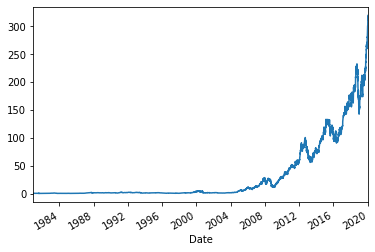

In [92]:
stock_c.plot()

## Q2

### Q2.1, Total how many trading days the stock price close at below 50 dollars ? (fill in the number in Camino)

In [94]:
len(stock_c[stock_c < 50])

7682

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [95]:
(stock_c[stock_c > 50]).index[0]

Timestamp('2011-02-07 00:00:00')

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares. (choose the right number in Camino)

In [96]:
closeGT50 = stock_v[stock_c > 50] #filter dates with close price greater than $50
closeGT50[stock_v > 100000000] #from the previous filter, filter out days when trading volume > 100,000,000
len(closeGT50[stock_v > 100000000]) #find length of the filtered data 
#answer: 404

Date
2011-02-07    121255400.0
2011-02-09    120686300.0
2011-02-10    232137500.0
2011-02-16    120289400.0
2011-02-17    132645800.0
2011-02-18    204014300.0
2011-02-28    100768500.0
2011-03-02    150647700.0
2011-03-03    125197100.0
2011-03-04    113316700.0
2011-03-07    136530800.0
2011-03-09    113326500.0
2011-03-11    117770100.0
2011-03-14    108989300.0
2011-03-25    112227500.0
2011-04-21    188452600.0
2011-04-29    251586300.0
2011-07-06    111156500.0
2011-07-08    122408300.0
2011-07-11    110668600.0
2011-07-12    112902300.0
2011-07-14    107633400.0
2011-07-15    121116800.0
2011-07-18    143163300.0
2011-07-19    204786400.0
2011-07-20    235335100.0
2011-07-21    131633600.0
2011-07-22    129182200.0
2011-07-25    147451500.0
2011-07-26    119145600.0
                 ...     
2014-01-23    100809800.0
2014-01-24    107338700.0
2014-01-27    138719700.0
2014-01-28    266380800.0
2014-01-29    125702500.0
2014-01-30    169625400.0
2014-01-31    116199300.0
2014-02

404

## Q3

### Q3.1, For dates with price close at more than 100 dollars, how many days are before 2014-01-01 ? Show the date and stock price.  (choose the number of days in Camino)

In [98]:
(stock_c[stock_c > 100])[:"2014-01-01"]
len((stock_c[stock_c > 100])[:"2014-01-01"])

Date
2012-09-18    100.272858
2012-09-19    100.300003
2012-09-21    100.012856
Name: Close, dtype: float64

3

### Q3.2, Show the top 5 trading volume(date and volume) for stock price over 100 dollars. (choose the largest volume date in Camino)

In [100]:
stock_v[stock_c > 100].nlargest(5)

Date
2015-08-24    162206300.0
2015-01-28    146477100.0
2012-09-21    142897300.0
2015-08-21    128275500.0
2015-08-04    124138600.0
Name: Volume, dtype: float64

### Q3.3, Based on top 5 trading volume dates for stock price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [71]:
top5VolIndex = stock_v[stock_c > 100].nlargest(5).index
top5VolIndex
stock_c[top5VolIndex].sort_values(ascending = False)

DatetimeIndex(['2015-08-24', '2015-01-28', '2012-09-21', '2015-08-21',
               '2015-08-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

Date
2015-01-28    115.309998
2015-08-04    114.639999
2015-08-21    105.760002
2015-08-24    103.120003
2012-09-21    100.012856
Name: Close, dtype: float64

### Q3.4, Based on top 5 trading volume dates for stock price over 100 dollars, which date it lost the most per share? (choose the date in Camino)

In [109]:
top5VolIndex = stock_v[stock_c > 100].nlargest(5).index

(stock_c[top5VolIndex] - stock_o[top5VolIndex]).nsmallest(1)

Date
2015-08-21   -4.669998
dtype: float64